The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

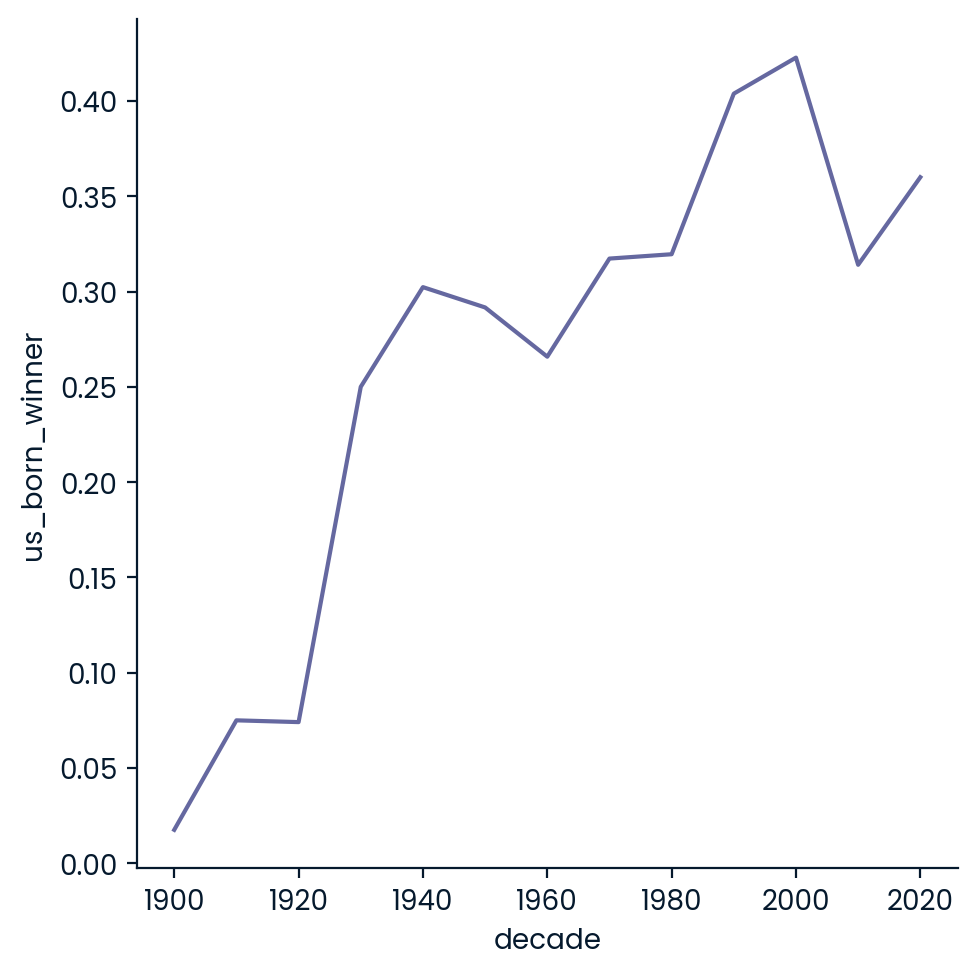

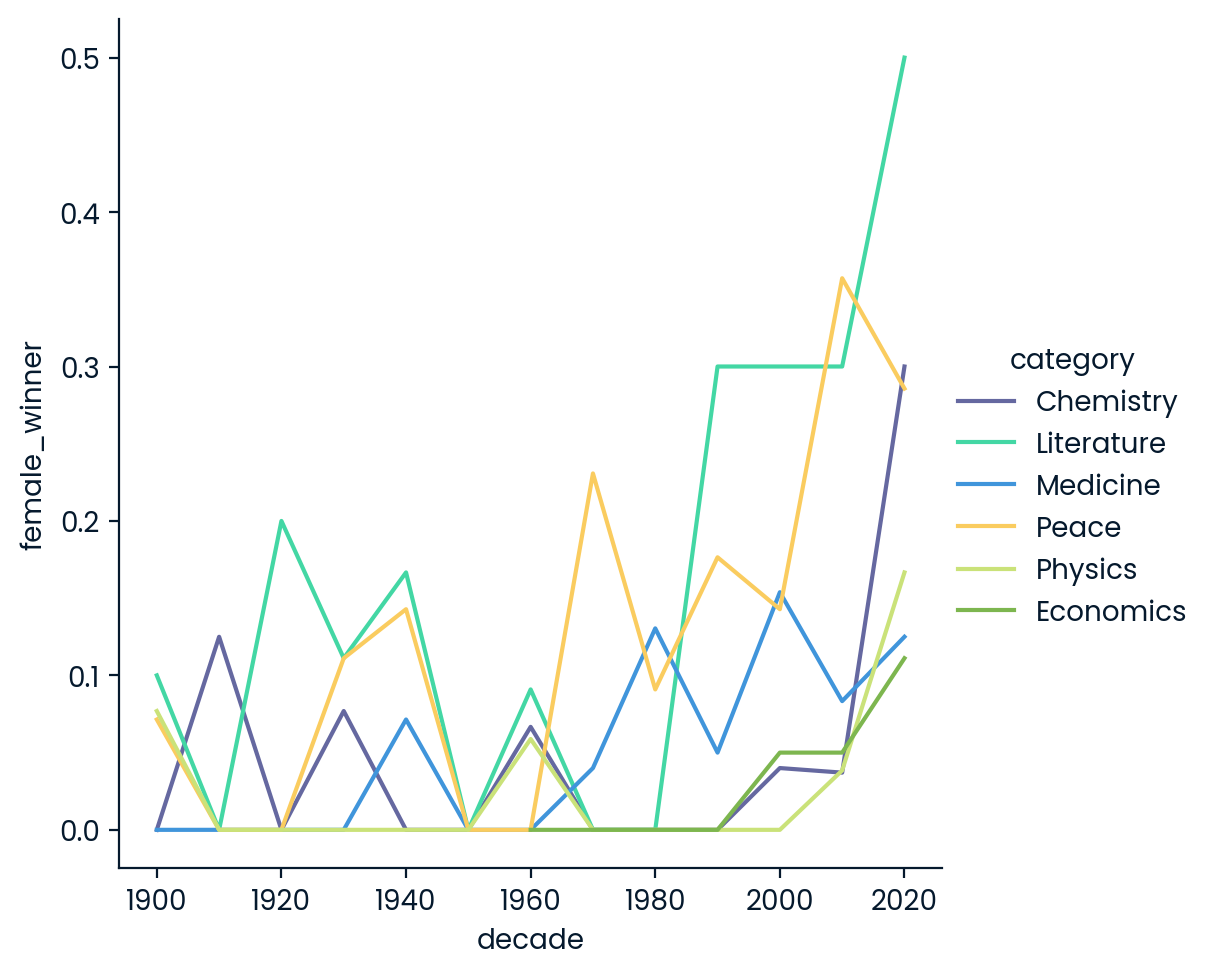


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.

 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [16]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
df = pd.read_csv("data/nobel.csv")
df.head()

#most commonly awarded gender and country
top_gender = df["sex"].value_counts().index[0]
top_gender

top_country = df["birth_country"].value_counts().index[0]
top_country

# ratio of US-born prize winners
df["us_born_winner"] = df["birth_country"] == "United States of America"
df["decade"] = (np.floor(df["year"]/10)*10).astype(int)
#finding the ratio
ratio = df.groupby("decade", as_index=False)["us_born_winner"].mean()
max_decade_usa = ratio[ratio["us_born_winner"] == ratio["us_born_winner"].max()]['decade'].values[0]
max_decade_usa

#relational line plot
sns.relplot(x="decade", y="us_born_winner", data=ratio, kind="line", ci=None)
plt.show()
#highest proportion of female laureates
df["female_winner"] = df["sex"] == "Female"
mean_female = df.groupby(["decade", "category"], as_index=False)["female_winner"].mean()
max_female = mean_female[mean_female["female_winner"] == mean_female["female_winner"].max()][["decade", "category"]]

max_female_dict = {max_female["decade"].values[0]: max_female["category"].values[0]}
max_female_dict
#plot
sns.relplot(x="decade", y="female_winner", data=mean_female, kind="line", hue="category", ci=None)
plt.show()
#first woman to receive a Nobel prize
first_woman = df[df["female_winner"]]
min_row = first_woman[first_woman["year"] == first_woman["year"].min()]
first_woman_name = min_row["full_name"].values[0]
first_woman_category = min_row["category"].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

# Selecting the laureates that have received 2 or more prizes
counts = df["full_name"].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)